# Liver Cirrhosis Stage Prediction 
* **Keywords**: Liver, Cirrhosis, ML prediction, Classification, RandomForestClassifier, XGBClassifier, StratifiedKFold, KFold, train_test_split
* **Description**: Predict the stage of liver cirrhosis using patient data containing 18 variables. 
* **Results**: Obtained an accuracy 0.47 and standard deviation of 0.055 for RamdomForest classification. 


## Set up 

### Import libraries 

In [1]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

##Import Data 
* data source from Kaggle: https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cirrhosis.csv")
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


## Preprossessing 

In [3]:
## Data cleaning 
# Delete the row with Nan (We can also replace Nan with mean values)
nonan_df = df.dropna()
nonan_df = nonan_df.reset_index(drop=True)
nonan_df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,308,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
272,309,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
273,310,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
274,311,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [4]:
# Get the X (independent variables) data
X = nonan_df.loc[:,'N_Days':'Prothrombin']
X

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4
272,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8
273,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2
274,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5


In [5]:
# Get the y (dependent variable)
y = nonan_df['Stage']
y

0      4.0
1      3.0
2      4.0
3      4.0
4      3.0
      ... 
271    2.0
272    2.0
273    2.0
274    2.0
275    2.0
Name: Stage, Length: 276, dtype: float64

## Annotation 
* Since RandomForestClassifier only accepts numerical values, we need to turn str to int 

In [6]:
# convert string to integers using LabelEncoder 
le = LabelEncoder()
X_encode = pd.DataFrame(data=None)
for i in X.columns.array:
  X_encode[i] = le.fit_transform(X[i])
X_encode

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,20,2,0,219,0,1,1,1,2,71,58,7,108,177,102,103,47,30
1,263,0,0,205,0,0,1,1,0,8,85,113,43,258,75,36,68,14
2,57,2,0,266,1,0,0,0,1,11,9,58,126,8,56,7,29,28
3,140,2,0,184,0,0,1,1,1,15,44,5,50,255,17,40,44,11
4,105,1,1,42,0,0,1,1,0,30,70,62,101,30,74,21,20,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,66,0,0,232,0,0,1,0,0,1,45,67,14,50,50,60,113,12
272,55,0,1,215,0,0,0,0,0,1,57,9,30,119,23,30,74,16
273,51,0,0,240,0,0,0,0,0,14,149,45,28,175,125,48,76,10
274,42,0,0,40,0,0,0,0,0,17,46,32,54,93,78,36,147,13


In [7]:
## Find outliers 
# Z-score calculation 
# Can be further simplify by 'pd.DataFrame.apply' method 
z_score = pd.DataFrame(data=None)
for row in range(len(X_encode)):
  z_score = z_score.append({'Age':(X_encode['Age'][row] - X_encode['Age'].mean())/X_encode['Age'].std(),
                            'Albumin':(X_encode['Albumin'][row] - X_encode['Albumin'].mean())/X_encode['Albumin'].std(),
                            'Alk_Phos':(X_encode['Alk_Phos'][row] - X_encode['Alk_Phos'].mean())/X_encode['Alk_Phos'].std(),
                            'Ascites':(X_encode['Ascites'][row] - X_encode['Ascites'].mean())/X_encode['Ascites'].std(),
                            'Bilirubin':(X_encode['Bilirubin'][row] - X_encode['Bilirubin'].mean())/X_encode['Bilirubin'].std(),
                            'Cholesterol':(X_encode['Cholesterol'][row] - X_encode['Cholesterol'].mean())/X_encode['Cholesterol'].std(),
                            'Copper':(X_encode['Copper'][row] - X_encode['Copper'].mean())/X_encode['Copper'].std(),
                            'Drug':(X_encode['Drug'][row] - X_encode['Drug'].mean())/X_encode['Drug'].std(),
                            'Edema':(X_encode['Edema'][row] - X_encode['Edema'].mean())/X_encode['Edema'].std(),
                            'Hepatomegaly':(X_encode['Hepatomegaly'][row] - X_encode['Hepatomegaly'].mean())/X_encode['Hepatomegaly'].std(),
                            'N_Days':(X_encode['N_Days'][row] - X_encode['N_Days'].mean())/X_encode['N_Days'].std(),
                            'Platelets':(X_encode['Platelets'][row] - X_encode['Platelets'].mean())/X_encode['Platelets'].std(),
                            'Prothrombin':(X_encode['Prothrombin'][row] - X_encode['Prothrombin'].mean())/X_encode['Prothrombin'].std(),
                            'SGOT':(X_encode['SGOT'][row] - X_encode['SGOT'].mean())/X_encode['SGOT'].std(),
                            'Sex':(X_encode['Sex'][row] - X_encode['Sex'].mean())/X_encode['Sex'].std(),
                            'Spiders':(X_encode['Spiders'][row] - X_encode['Spiders'].mean())/X_encode['Spiders'].std(),
                            'Status':(X_encode['Status'][row] - X_encode['Status'].mean())/X_encode['Status'].std(),
                            'Tryglicerides':(X_encode['Tryglicerides'][row] - X_encode['Tryglicerides'].mean())/X_encode['Tryglicerides'].std()}
                            ,ignore_index=True)
z_score

,Age,Albumin,Alk_Phos,Ascites,Bilirubin,Cholesterol,Copper,Drug,Edema,Hepatomegaly,N_Days,Platelets,Prothrombin,SGOT,Sex,Spiders,Status,Tryglicerides
0,1.024471,-1.849968,0.551878,3.671145,2.335386,-0.660696,1.072838,-1.012760,3.303767,0.969661,-1.472480,-0.904478,1.734819,0.535476,-0.374148,1.562409,1.177851,1.104165
1,0.848715,1.642493,1.594449,-0.271408,-0.623496,-0.163874,-0.547392,-1.012760,-0.395380,0.969661,1.704700,-0.498503,-0.112531,-0.063319,-0.374148,1.562409,-0.906040,-0.687536
2,1.614510,-0.169633,-1.623363,-0.271408,-0.482596,-1.562336,1.521517,-1.012760,1.454194,-1.027551,-0.988712,-1.252456,1.503900,-0.484692,2.663054,-0.637718,1.177851,-1.463048
3,0.585081,-1.915864,1.555836,-0.271408,-0.294731,-0.918307,-0.372906,-1.012760,1.454194,0.969661,0.096498,-0.962474,-0.458909,-1.349617,-0.374148,1.562409,1.177851,-0.580568
4,-1.197589,-0.037842,-1.340196,-0.271408,0.409765,-0.439886,0.898352,0.983824,-0.395380,0.969661,-0.361121,-1.426445,0.233847,-0.085496,-0.374148,1.562409,0.135906,-1.088662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1.187673,0.126897,-1.082771,-0.271408,-0.952260,-0.899907,-1.270264,-1.012760,-0.395380,0.969661,-0.871038,0.371443,-0.343450,-0.617758,-0.374148,-0.637718,-0.906040,-0.045732
272,0.974255,-1.784073,-0.194654,-0.271408,-0.952260,-0.679097,-0.871438,0.983824,-0.395380,-1.027551,-1.014861,-0.382510,0.118388,-1.216552,-0.374148,-0.637718,-0.906040,-0.847986
273,1.288105,-0.597954,0.526136,-0.271408,-0.341697,1.013778,-0.921291,-1.012760,-0.395380,-1.027551,-1.067160,-0.343846,-0.574368,1.045559,-0.374148,-0.637718,-0.906040,-0.366634
274,-1.222697,-1.026274,-0.529307,-0.271408,-0.200798,-0.881506,-0.273199,-1.012760,-0.395380,-1.027551,-1.184834,1.028736,-0.227990,0.003214,-0.374148,-0.637718,-0.906040,-0.687536


### More preprossessing 

In [8]:
# Delete the row having any outlier (only save rows having no z-score > 3 or <-3)
no_outlier = z_score
no_outlier = no_outlier[(no_outlier.iloc[:, :] <= 3).all(axis=1)]
no_outlier = no_outlier[(no_outlier.iloc[:, :] >= -3).all(axis=1)]
no_outlier

,Age,Albumin,Alk_Phos,Ascites,Bilirubin,Cholesterol,Copper,Drug,Edema,Hepatomegaly,N_Days,Platelets,Prothrombin,SGOT,Sex,Spiders,Status,Tryglicerides
1,0.848715,1.642493,1.594449,-0.271408,-0.623496,-0.163874,-0.547392,-1.012760,-0.395380,0.969661,1.704700,-0.498503,-0.112531,-0.063319,-0.374148,1.562409,-0.906040,-0.687536
2,1.614510,-0.169633,-1.623363,-0.271408,-0.482596,-1.562336,1.521517,-1.012760,1.454194,-1.027551,-0.988712,-1.252456,1.503900,-0.484692,2.663054,-0.637718,1.177851,-1.463048
3,0.585081,-1.915864,1.555836,-0.271408,-0.294731,-0.918307,-0.372906,-1.012760,1.454194,0.969661,0.096498,-0.962474,-0.458909,-1.349617,-0.374148,1.562409,1.177851,-0.580568
4,-1.197589,-0.037842,-1.340196,-0.271408,0.409765,-0.439886,0.898352,0.983824,-0.395380,0.969661,-0.361121,-1.426445,0.233847,-0.085496,-0.374148,1.562409,0.135906,-1.088662
5,0.685513,1.543650,-1.005543,-0.271408,-0.670462,0.075337,-0.597245,0.983824,-0.395380,0.969661,0.044199,-0.730489,-1.151665,-1.371795,-0.374148,-0.637718,-0.906040,1.639001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1.187673,0.126897,-1.082771,-0.271408,-0.952260,-0.899907,-1.270264,-1.012760,-0.395380,0.969661,-0.871038,0.371443,-0.343450,-0.617758,-0.374148,-0.637718,-0.906040,-0.045732
272,0.974255,-1.784073,-0.194654,-0.271408,-0.952260,-0.679097,-0.871438,0.983824,-0.395380,-1.027551,-1.014861,-0.382510,0.118388,-1.216552,-0.374148,-0.637718,-0.906040,-0.847986
273,1.288105,-0.597954,0.526136,-0.271408,-0.341697,1.013778,-0.921291,-1.012760,-0.395380,-1.027551,-1.067160,-0.343846,-0.574368,1.045559,-0.374148,-0.637718,-0.906040,-0.366634
274,-1.222697,-1.026274,-0.529307,-0.271408,-0.200798,-0.881506,-0.273199,-1.012760,-0.395380,-1.027551,-1.184834,1.028736,-0.227990,0.003214,-0.374148,-0.637718,-0.906040,-0.687536


In [9]:
## Find each variable's correlation with 'stage'
# Delete outliers from X_encode
X_comb = no_outlier.merge(X_encode, how='left', left_index=True, right_index=True)
X_no_out = X_comb.loc[:,'N_Days_y':'Prothrombin_y']
# Arrange back to the orignial order 
X_no_out2 = X_no_out[['Age_y',
 'Albumin_y',
 'Alk_Phos_y',
 'Ascites_y',
 'Bilirubin_y',
 'Cholesterol_y',
 'Copper_y',
 'Drug_y',
 'Edema_y',
 'Hepatomegaly_y',
 'N_Days_y',
 'Platelets_y',
 'Prothrombin_y',
 'SGOT_y',
 'Sex_y',
 'Spiders_y',
 'Status_y',
 'Tryglicerides_y']]

X_no_out2.columns = ['Age',
 'Albumin',
 'Alk_Phos',
 'Ascites',
 'Bilirubin',
 'Cholesterol',
 'Copper',
 'Drug',
 'Edema',
 'Hepatomegaly',
 'N_Days',
 'Platelets',
 'Prothrombin',
 'SGOT',
 'Sex',
 'Spiders',
 'Status',
 'Tryglicerides']
X_no_out2


,Age,Albumin,Alk_Phos,Ascites,Bilirubin,Cholesterol,Copper,Drug,Edema,Hepatomegaly,N_Days,Platelets,Prothrombin,SGOT,Sex,Spiders,Status,Tryglicerides
1,205,113,258,0,8,85,43,0,0,1,263,68,14,75,0,1,0,36
2,266,58,8,0,11,9,126,0,1,0,57,29,28,56,1,0,2,7
3,184,5,255,0,15,44,50,0,1,1,140,44,11,17,0,1,2,40
4,42,62,30,0,30,70,101,1,0,1,105,20,17,74,0,1,1,21
5,192,110,56,0,7,98,41,1,0,1,136,56,5,16,0,0,0,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,232,67,50,0,1,45,14,0,0,1,66,113,12,50,0,0,0,60
272,215,9,119,0,1,57,30,1,0,0,55,74,16,23,0,0,0,30
273,240,45,175,0,14,149,28,0,0,0,51,76,10,125,0,0,0,48
274,40,32,93,0,17,46,54,0,0,0,42,147,13,78,0,0,0,36


In [10]:
X_no_out_ls = [] 
for i in no_outlier.columns.tolist():
  X_no_out_ls.append(i + "_y")
X_no_out_ls

['Age_y',
 'Albumin_y',
 'Alk_Phos_y',
 'Ascites_y',
 'Bilirubin_y',
 'Cholesterol_y',
 'Copper_y',
 'Drug_y',
 'Edema_y',
 'Hepatomegaly_y',
 'N_Days_y',
 'Platelets_y',
 'Prothrombin_y',
 'SGOT_y',
 'Sex_y',
 'Spiders_y',
 'Status_y',
 'Tryglicerides_y']

In [11]:
# Combine X and y 
comb_df = X_no_out2.merge(y,how='left', left_index=True, right_index=True)
comb_df 

,Age,Albumin,Alk_Phos,Ascites,Bilirubin,Cholesterol,Copper,Drug,Edema,Hepatomegaly,N_Days,Platelets,Prothrombin,SGOT,Sex,Spiders,Status,Tryglicerides,Stage
1,205,113,258,0,8,85,43,0,0,1,263,68,14,75,0,1,0,36,3.0
2,266,58,8,0,11,9,126,0,1,0,57,29,28,56,1,0,2,7,4.0
3,184,5,255,0,15,44,50,0,1,1,140,44,11,17,0,1,2,40,4.0
4,42,62,30,0,30,70,101,1,0,1,105,20,17,74,0,1,1,21,3.0
5,192,110,56,0,7,98,41,1,0,1,136,56,5,16,0,0,0,123,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,232,67,50,0,1,45,14,0,0,1,66,113,12,50,0,0,0,60,2.0
272,215,9,119,0,1,57,30,1,0,0,55,74,16,23,0,0,0,30,2.0
273,240,45,175,0,14,149,28,0,0,0,51,76,10,125,0,0,0,48,2.0
274,40,32,93,0,17,46,54,0,0,0,42,147,13,78,0,0,0,36,2.0


## Data Pattern Analysis 

In [12]:
# Look for correlation of each var with 'stage'
corr_matrix = comb_df.corr()

for i in comb_df.columns:
  print(i, corr_matrix.loc[i, 'Stage'])

Age 0.11261820699281888
Albumin -0.20891021873094204
Alk_Phos 0.1393506139436657
Ascites nan
Bilirubin 0.2430122446741165
Cholesterol 0.06575772399747691
Copper 0.24774181466436287
Drug 0.10455948735427477
Edema 0.09920748102824513
Hepatomegaly 0.46936158186924753
N_Days -0.2974511543122007
Platelets -0.17334117685305184
Prothrombin 0.19016899364501466
SGOT 0.1676159904972819
Sex 0.046226407809187145
Spiders 0.28659596918965585
Status 0.2595643719584589
Tryglicerides 0.08083247067017825
Stage 1.0


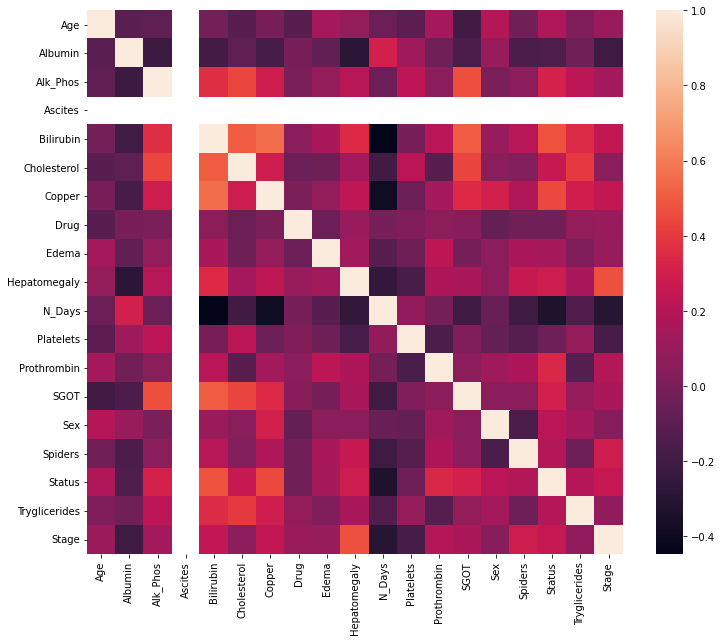

In [13]:
# show correlation via heatmap 
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False)
plt.show()

## Random Forest Classification
* With StratifiedKFold to prevent class imbalance 
* Also tried out KFold and train_test_split

In [14]:
# Get X (ind) and y (dep)
X = comb_df.drop(columns='Stage')
y = comb_df['Stage']
X

,Age,Albumin,Alk_Phos,Ascites,Bilirubin,Cholesterol,Copper,Drug,Edema,Hepatomegaly,N_Days,Platelets,Prothrombin,SGOT,Sex,Spiders,Status,Tryglicerides
1,205,113,258,0,8,85,43,0,0,1,263,68,14,75,0,1,0,36
2,266,58,8,0,11,9,126,0,1,0,57,29,28,56,1,0,2,7
3,184,5,255,0,15,44,50,0,1,1,140,44,11,17,0,1,2,40
4,42,62,30,0,30,70,101,1,0,1,105,20,17,74,0,1,1,21
5,192,110,56,0,7,98,41,1,0,1,136,56,5,16,0,0,0,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,232,67,50,0,1,45,14,0,0,1,66,113,12,50,0,0,0,60
272,215,9,119,0,1,57,30,1,0,0,55,74,16,23,0,0,0,30
273,240,45,175,0,14,149,28,0,0,0,51,76,10,125,0,0,0,48
274,40,32,93,0,17,46,54,0,0,0,42,147,13,78,0,0,0,36


In [26]:
# Random forest classifier 
RFC = RandomForestClassifier(n_estimators=300, max_depth=10)

In [27]:
## Stratified KFold 
accuracy = []
skf = StratifiedKFold(n_splits=10, random_state=146, shuffle=True)
for idx_train, idx_test in skf.split(X,y):
  Xtrain, Xtest = X.iloc[idx_train], X.iloc[idx_test]
  ytrain, ytest = y.iloc[idx_train], y.iloc[idx_test]

  RFC.fit(Xtrain,ytrain)
  y_pred = RFC.predict(Xtest)
  score = accuracy_score(y_pred, ytest)
  accuracy.append(score)
print(accuracy)

[0.46153846153846156, 0.34615384615384615, 0.48, 0.6, 0.56, 0.4, 0.4, 0.44, 0.48, 0.48]


In [28]:
print(f"Accuracy: {np.mean(accuracy)} Std: {np.std(accuracy)}")

Accuracy: 0.4647692307692308 Std: 0.0715093406403427


In [29]:
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.17      0.25      0.20         4
         3.0       0.50      0.38      0.43        13
         4.0       0.75      0.75      0.75         8

    accuracy                           0.48        25
   macro avg       0.35      0.35      0.35        25
weighted avg       0.53      0.48      0.50        25



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# How about just KFold validation?
score = cross_val_score(RFC, X, y, cv=10)
score

array([0.5 , 0.5 , 0.48, 0.52, 0.48, 0.48, 0.48, 0.32, 0.44, 0.4 ])

In [31]:
print(f"Accuracy: {np.mean(score)} Std: {np.std(score)}")

Accuracy: 0.4600000000000001 Std: 0.0565685424949238


In [32]:
# How about just train_test_split?
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33)
RFC.fit(Xtrain, ytrain)
y_pred = RFC.predict(Xtest)
score = accuracy_score(y_pred, ytest)
#score = classification_report(y_pred, ytest)
score

0.35714285714285715



---



---



### XGBClassifier 

In [33]:
# How about using XGBClassifier?
import xgboost as xgb 
model = xgb.XGBClassifier(n_estimates=500)
model.fit(Xtrain,ytrain)
y_pred = model.predict(Xtest)
score = accuracy_score(y_pred, ytest)
score

0.42857142857142855

## Less stringent way of preprocessing 
### Directly encode Nan as a numeral value via LabelEncoder()

In [34]:
# Maybe we should not delete that many Nan rows in the begining...
# Replace Nan with mean values of the column 
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cirrhosis.csv")
df2

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [35]:
nn = df2['Stage'].isna()
df2[nn]

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
312,313,4062,C,NaN,21915,F,NaN,NaN,NaN,N,0.7,NaN,3.65,NaN,NaN,NaN,NaN,378.0,11.0,NaN
316,317,3030,C,NaN,22646,F,NaN,NaN,NaN,N,0.8,NaN,2.48,NaN,NaN,NaN,NaN,273.0,10.0,NaN
318,319,41,D,NaN,16802,F,NaN,NaN,NaN,N,5.0,NaN,2.93,NaN,NaN,NaN,NaN,260.0,10.4,NaN
321,322,2011,D,NaN,23376,F,NaN,NaN,NaN,N,1.1,NaN,3.69,NaN,NaN,NaN,NaN,139.0,10.5,NaN
333,334,466,D,NaN,20454,F,NaN,NaN,NaN,N,7.1,NaN,3.51,NaN,NaN,NaN,NaN,721.0,11.8,NaN
336,337,2286,D,NaN,20454,F,NaN,NaN,NaN,N,1.8,NaN,3.64,NaN,NaN,NaN,NaN,141.0,10.0,NaN


### Still need to drop Nan in y (depedent variable) for misclassification 

In [36]:
# Drop row having Nan as y 
nan_ls = []
idx_nan = df2['Stage'].isna()
for idx,boo in enumerate(idx_nan):
  if boo==True:
    nan_ls.append(idx)
nan_ls
df2_nonan = df2.drop(index=nan_ls)
df2_nonan

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [37]:
# Separate X and y, also drop ID 
X = df2_nonan.drop(columns=['Stage'])
y_ori = df2_nonan[['ID','Stage']]
y_ori

,ID,Stage
0,1,4.0
1,2,3.0
2,3,4.0
3,4,4.0
4,5,3.0
...,...,...
413,414,3.0
414,415,4.0
415,416,3.0
416,417,3.0


In [38]:
y_ori.isna().any()

ID       False
Stage    False
dtype: bool

In [39]:
# Convert string to numerical values using LabelEncoder 
lenc = LabelEncoder()
X_encode = pd.DataFrame(df2_nonan['ID'])
for var in X.columns.tolist()[1:]:
  X_encode[var] = lenc.fit_transform(df2_nonan[var])
X_encode

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,1,29,2,0,267,0,1,1,1,2,83,58,12,112,196,111,105,66,32
1,2,389,0,0,249,0,0,1,1,0,8,86,138,45,282,82,37,91,16
2,3,86,2,0,333,1,0,0,0,1,11,9,78,131,8,60,7,42,30
3,4,215,2,0,223,0,0,1,1,1,15,44,9,52,278,20,41,62,13
4,5,166,1,1,52,0,0,1,1,0,31,71,83,105,32,81,21,30,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,43,2,2,317,0,2,2,2,0,9,201,30,158,295,179,146,55,19
414,415,101,0,2,61,0,2,2,2,0,6,201,112,158,295,179,146,59,22
415,416,90,0,2,256,0,2,2,2,0,13,201,72,158,295,179,146,36,9
416,417,44,0,2,260,0,2,2,2,0,5,201,104,158,295,179,146,125,14


In [40]:
mask = X_encode.isna().any(axis=1)
X_encode[mask]
# the result shows no Nan if I just LabelEncode directly, but it might be problematic later...

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin


In [41]:
## Find outliers 
# Z-score calculation 
# Can be further simplify by 'pd.DataFrame.apply' method 
z_score = pd.DataFrame(data=None)
for row in X_encode['ID'].tolist():
  z_score = z_score.append({'ID':int(X_encode[X_encode['ID']==row]['ID']),
                            'Age':(int(X_encode[X_encode['ID']==row]['Age']) - X_encode['Age'].mean())/X_encode['Age'].std(),
                            'Albumin':(int(X_encode[X_encode['ID']==row]['Albumin']) - X_encode['Albumin'].mean())/X_encode['Albumin'].std(),
                            'Alk_Phos':(int(X_encode[X_encode['ID']==row]['Alk_Phos']) - X_encode['Alk_Phos'].mean())/X_encode['Alk_Phos'].std(),
                            'Ascites':(int(X_encode[X_encode['ID']==row]['Ascites']) - X_encode['Ascites'].mean())/X_encode['Ascites'].std(),
                            'Bilirubin':(int(X_encode[X_encode['ID']==row]['Bilirubin']) - X_encode['Bilirubin'].mean())/X_encode['Bilirubin'].std(),
                            'Cholesterol':(int(X_encode[X_encode['ID']==row]['Cholesterol']) - X_encode['Cholesterol'].mean())/X_encode['Cholesterol'].std(),
                            'Copper':(int(X_encode[X_encode['ID']==row]['Copper']) - X_encode['Copper'].mean())/X_encode['Copper'].std(),
                            'Drug':(int(X_encode[X_encode['ID']==row]['Drug']) - X_encode['Drug'].mean())/X_encode['Drug'].std(),
                            'Edema':(int(X_encode[X_encode['ID']==row]['Edema']) - X_encode['Edema'].mean())/X_encode['Edema'].std(),
                            'Hepatomegaly':(int(X_encode[X_encode['ID']==row]['Hepatomegaly']) - X_encode['Hepatomegaly'].mean())/X_encode['Hepatomegaly'].std(),
                            'N_Days':(int(X_encode[X_encode['ID']==row]['N_Days']) - X_encode['N_Days'].mean())/X_encode['N_Days'].std(),
                            'Platelets':(int(X_encode[X_encode['ID']==row]['Platelets']) - X_encode['Platelets'].mean())/X_encode['Platelets'].std(),
                            'Prothrombin':(int(X_encode[X_encode['ID']==row]['Prothrombin']) - X_encode['Prothrombin'].mean())/X_encode['Prothrombin'].std(),
                            'SGOT':(int(X_encode[X_encode['ID']==row]['SGOT']) - X_encode['SGOT'].mean())/X_encode['SGOT'].std(),
                            'Sex':(int(X_encode[X_encode['ID']==row]['Sex']) - X_encode['Sex'].mean())/X_encode['Sex'].std(),
                            'Spiders':(int(X_encode[X_encode['ID']==row]['Spiders']) - X_encode['Spiders'].mean())/X_encode['Spiders'].std(),
                            'Status':(int(X_encode[X_encode['ID']==row]['Status']) - X_encode['Status'].mean())/X_encode['Status'].std(),
                            'Tryglicerides':(int(X_encode[X_encode['ID']==row]['Tryglicerides']) - X_encode['Tryglicerides'].mean())/X_encode['Tryglicerides'].std()}
                            ,ignore_index=True)
z_score

,ID,Age,Albumin,Alk_Phos,Ascites,Bilirubin,Cholesterol,Copper,Drug,Edema,Hepatomegaly,N_Days,Platelets,Prothrombin,SGOT,Sex,Spiders,Status,Tryglicerides
0,1.0,0.937867,-1.919163,0.144216,0.532138,2.468731,-1.040212,0.434785,-1.102048,3.522247,0.163327,-1.469530,-0.793055,1.636426,0.082824,-0.345362,0.355056,1.233933,0.318758
1,2.0,0.753550,1.579242,1.021443,-0.634037,-0.582621,-0.623274,-0.818013,-1.102048,-0.399823,0.163327,1.716331,-0.408131,-0.125920,-0.408528,-0.345362,0.355056,-0.862481,-1.041328
2,3.0,1.613699,-0.086665,-1.773443,-0.634037,-0.460567,-1.769853,0.790056,-1.102048,1.561212,-1.130723,-0.965102,-1.162582,1.416133,-0.781279,2.888483,-0.843985,1.233933,-1.641366
3,4.0,0.487313,-2.002458,0.980641,-0.634037,-0.297828,-1.248681,-0.687124,-1.102048,1.561212,0.163327,0.176498,-0.854643,-0.456360,-1.459007,-0.345362,0.355056,1.233933,-0.961323
4,5.0,-1.263704,0.052161,-1.528636,-0.634037,0.353127,-0.846634,0.303896,0.180561,-0.399823,0.163327,-0.257133,-1.347346,0.204520,-0.425472,-0.345362,0.355056,0.185726,-1.361348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,414.0,1.449861,-1.419390,1.154047,1.698314,-0.541936,1.089148,1.294915,1.463171,-0.399823,1.457376,-1.345635,-0.962422,0.204520,1.234962,-0.345362,1.554096,1.233933,1.138810
408,415.0,-1.171545,0.857349,1.154047,1.698314,-0.663990,1.089148,1.294915,1.463171,-0.399823,1.457376,-0.832358,-0.900834,0.534960,1.234962,-0.345362,1.554096,-0.862481,1.138810
409,416.0,0.825229,-0.253256,1.154047,1.698314,-0.379197,1.089148,1.294915,1.463171,-0.399823,1.457376,-0.929704,-1.254964,-0.896947,1.234962,-0.345362,1.554096,-0.862481,1.138810
410,417.0,0.866188,0.635228,1.154047,1.698314,-0.704675,1.089148,1.294915,1.463171,-0.399823,1.457376,-1.336786,0.115365,-0.346213,1.234962,-0.345362,1.554096,-0.862481,1.138810


In [42]:
# Delete the row having any outlier (only save rows having no z-score > 3 or <-3)
no_outlier = z_score
no_outlier = no_outlier[(no_outlier.iloc[:, 1:] <= 3).all(axis=1)]
no_outlier = no_outlier[(no_outlier.iloc[:, 1:] >= -3).all(axis=1)]
no_outlier


,ID,Age,Albumin,Alk_Phos,Ascites,Bilirubin,Cholesterol,Copper,Drug,Edema,Hepatomegaly,N_Days,Platelets,Prothrombin,SGOT,Sex,Spiders,Status,Tryglicerides
1,2.0,0.753550,1.579242,1.021443,-0.634037,-0.582621,-0.623274,-0.818013,-1.102048,-0.399823,0.163327,1.716331,-0.408131,-0.125920,-0.408528,-0.345362,0.355056,-0.862481,-1.041328
2,3.0,1.613699,-0.086665,-1.773443,-0.634037,-0.460567,-1.769853,0.790056,-1.102048,1.561212,-1.130723,-0.965102,-1.162582,1.416133,-0.781279,2.888483,-0.843985,1.233933,-1.641366
3,4.0,0.487313,-2.002458,0.980641,-0.634037,-0.297828,-1.248681,-0.687124,-1.102048,1.561212,0.163327,0.176498,-0.854643,-0.456360,-1.459007,-0.345362,0.355056,1.233933,-0.961323
4,5.0,-1.263704,0.052161,-1.528636,-0.634037,0.353127,-0.846634,0.303896,0.180561,-0.399823,0.163327,-0.257133,-1.347346,0.204520,-0.425472,-0.345362,0.355056,0.185726,-1.361348
5,6.0,1.429381,1.246061,-1.018620,-0.634037,-0.704675,-1.204009,-0.892807,0.180561,-0.399823,0.163327,0.716325,1.886015,0.314667,-0.832108,-0.345362,-0.843985,1.233933,-1.521358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,414.0,1.449861,-1.419390,1.154047,1.698314,-0.541936,1.089148,1.294915,1.463171,-0.399823,1.457376,-1.345635,-0.962422,0.204520,1.234962,-0.345362,1.554096,1.233933,1.138810
408,415.0,-1.171545,0.857349,1.154047,1.698314,-0.663990,1.089148,1.294915,1.463171,-0.399823,1.457376,-0.832358,-0.900834,0.534960,1.234962,-0.345362,1.554096,-0.862481,1.138810
409,416.0,0.825229,-0.253256,1.154047,1.698314,-0.379197,1.089148,1.294915,1.463171,-0.399823,1.457376,-0.929704,-1.254964,-0.896947,1.234962,-0.345362,1.554096,-0.862481,1.138810
410,417.0,0.866188,0.635228,1.154047,1.698314,-0.704675,1.089148,1.294915,1.463171,-0.399823,1.457376,-1.336786,0.115365,-0.346213,1.234962,-0.345362,1.554096,-0.862481,1.138810


In [43]:
# Combine X and y 
comb_df = no_outlier.merge(y_ori,on='ID')
comb_df 

,ID,Age,Albumin,Alk_Phos,Ascites,Bilirubin,Cholesterol,Copper,Drug,Edema,Hepatomegaly,N_Days,Platelets,Prothrombin,SGOT,Sex,Spiders,Status,Tryglicerides,Stage
0,2.0,0.753550,1.579242,1.021443,-0.634037,-0.582621,-0.623274,-0.818013,-1.102048,-0.399823,0.163327,1.716331,-0.408131,-0.125920,-0.408528,-0.345362,0.355056,-0.862481,-1.041328,3.0
1,3.0,1.613699,-0.086665,-1.773443,-0.634037,-0.460567,-1.769853,0.790056,-1.102048,1.561212,-1.130723,-0.965102,-1.162582,1.416133,-0.781279,2.888483,-0.843985,1.233933,-1.641366,4.0
2,4.0,0.487313,-2.002458,0.980641,-0.634037,-0.297828,-1.248681,-0.687124,-1.102048,1.561212,0.163327,0.176498,-0.854643,-0.456360,-1.459007,-0.345362,0.355056,1.233933,-0.961323,4.0
3,5.0,-1.263704,0.052161,-1.528636,-0.634037,0.353127,-0.846634,0.303896,0.180561,-0.399823,0.163327,-0.257133,-1.347346,0.204520,-0.425472,-0.345362,0.355056,0.185726,-1.361348,3.0
4,6.0,1.429381,1.246061,-1.018620,-0.634037,-0.704675,-1.204009,-0.892807,0.180561,-0.399823,0.163327,0.716325,1.886015,0.314667,-0.832108,-0.345362,-0.843985,1.233933,-1.521358,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,414.0,1.449861,-1.419390,1.154047,1.698314,-0.541936,1.089148,1.294915,1.463171,-0.399823,1.457376,-1.345635,-0.962422,0.204520,1.234962,-0.345362,1.554096,1.233933,1.138810,3.0
382,415.0,-1.171545,0.857349,1.154047,1.698314,-0.663990,1.089148,1.294915,1.463171,-0.399823,1.457376,-0.832358,-0.900834,0.534960,1.234962,-0.345362,1.554096,-0.862481,1.138810,4.0
383,416.0,0.825229,-0.253256,1.154047,1.698314,-0.379197,1.089148,1.294915,1.463171,-0.399823,1.457376,-0.929704,-1.254964,-0.896947,1.234962,-0.345362,1.554096,-0.862481,1.138810,3.0
384,417.0,0.866188,0.635228,1.154047,1.698314,-0.704675,1.089148,1.294915,1.463171,-0.399823,1.457376,-1.336786,0.115365,-0.346213,1.234962,-0.345362,1.554096,-0.862481,1.138810,3.0


In [44]:
# Separate X and y for training
X = comb_df.drop(columns=['ID','Stage'])
y = comb_df['Stage']
X

,Age,Albumin,Alk_Phos,Ascites,Bilirubin,Cholesterol,Copper,Drug,Edema,Hepatomegaly,N_Days,Platelets,Prothrombin,SGOT,Sex,Spiders,Status,Tryglicerides
0,0.753550,1.579242,1.021443,-0.634037,-0.582621,-0.623274,-0.818013,-1.102048,-0.399823,0.163327,1.716331,-0.408131,-0.125920,-0.408528,-0.345362,0.355056,-0.862481,-1.041328
1,1.613699,-0.086665,-1.773443,-0.634037,-0.460567,-1.769853,0.790056,-1.102048,1.561212,-1.130723,-0.965102,-1.162582,1.416133,-0.781279,2.888483,-0.843985,1.233933,-1.641366
2,0.487313,-2.002458,0.980641,-0.634037,-0.297828,-1.248681,-0.687124,-1.102048,1.561212,0.163327,0.176498,-0.854643,-0.456360,-1.459007,-0.345362,0.355056,1.233933,-0.961323
3,-1.263704,0.052161,-1.528636,-0.634037,0.353127,-0.846634,0.303896,0.180561,-0.399823,0.163327,-0.257133,-1.347346,0.204520,-0.425472,-0.345362,0.355056,0.185726,-1.361348
4,1.429381,1.246061,-1.018620,-0.634037,-0.704675,-1.204009,-0.892807,0.180561,-0.399823,0.163327,0.716325,1.886015,0.314667,-0.832108,-0.345362,-0.843985,1.233933,-1.521358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,1.449861,-1.419390,1.154047,1.698314,-0.541936,1.089148,1.294915,1.463171,-0.399823,1.457376,-1.345635,-0.962422,0.204520,1.234962,-0.345362,1.554096,1.233933,1.138810
382,-1.171545,0.857349,1.154047,1.698314,-0.663990,1.089148,1.294915,1.463171,-0.399823,1.457376,-0.832358,-0.900834,0.534960,1.234962,-0.345362,1.554096,-0.862481,1.138810
383,0.825229,-0.253256,1.154047,1.698314,-0.379197,1.089148,1.294915,1.463171,-0.399823,1.457376,-0.929704,-1.254964,-0.896947,1.234962,-0.345362,1.554096,-0.862481,1.138810
384,0.866188,0.635228,1.154047,1.698314,-0.704675,1.089148,1.294915,1.463171,-0.399823,1.457376,-1.336786,0.115365,-0.346213,1.234962,-0.345362,1.554096,-0.862481,1.138810


In [45]:
y.isna().any()

False

In [46]:
## Stratified KFold 
accuracy = []
skf = StratifiedKFold(n_splits=10)
for idx_train, idx_test in skf.split(X,y):
  Xtrain, Xtest = X.iloc[idx_train], X.iloc[idx_test]
  ytrain, ytest = y.iloc[idx_train], y.iloc[idx_test]

  RFC.fit(Xtrain,ytrain)
  y_pred = RFC.predict(Xtest)
  score = accuracy_score(y_pred, ytest)
  accuracy.append(score)
print(accuracy)

[0.5897435897435898, 0.41025641025641024, 0.48717948717948717, 0.5128205128205128, 0.46153846153846156, 0.5128205128205128, 0.47368421052631576, 0.5526315789473685, 0.5263157894736842, 0.3684210526315789]


In [47]:
print(f"Accuracy: {np.mean(accuracy)} Std: {np.std(accuracy)}")

Accuracy: 0.48954116059379216 Std: 0.06201167729950189




---



---



### intermediate Preprocessing 
* Drop outliers but keep the Nan 

In [48]:
# What if I did not get rid of the outliers?
# Combine X and y 
comb_df = X_encode.merge(y_ori,on='ID')
comb_df 

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,29,2,0,267,0,1,1,1,2,83,58,12,112,196,111,105,66,32,4.0
1,2,389,0,0,249,0,0,1,1,0,8,86,138,45,282,82,37,91,16,3.0
2,3,86,2,0,333,1,0,0,0,1,11,9,78,131,8,60,7,42,30,4.0
3,4,215,2,0,223,0,0,1,1,1,15,44,9,52,278,20,41,62,13,4.0
4,5,166,1,1,52,0,0,1,1,0,31,71,83,105,32,81,21,30,19,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,414,43,2,2,317,0,2,2,2,0,9,201,30,158,295,179,146,55,19,3.0
408,415,101,0,2,61,0,2,2,2,0,6,201,112,158,295,179,146,59,22,4.0
409,416,90,0,2,256,0,2,2,2,0,13,201,72,158,295,179,146,36,9,3.0
410,417,44,0,2,260,0,2,2,2,0,5,201,104,158,295,179,146,125,14,3.0


In [49]:
# Separate X and y for training
X = comb_df.drop(columns=['ID','Stage'])
y = comb_df['Stage']
X

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,29,2,0,267,0,1,1,1,2,83,58,12,112,196,111,105,66,32
1,389,0,0,249,0,0,1,1,0,8,86,138,45,282,82,37,91,16
2,86,2,0,333,1,0,0,0,1,11,9,78,131,8,60,7,42,30
3,215,2,0,223,0,0,1,1,1,15,44,9,52,278,20,41,62,13
4,166,1,1,52,0,0,1,1,0,31,71,83,105,32,81,21,30,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,43,2,2,317,0,2,2,2,0,9,201,30,158,295,179,146,55,19
408,101,0,2,61,0,2,2,2,0,6,201,112,158,295,179,146,59,22
409,90,0,2,256,0,2,2,2,0,13,201,72,158,295,179,146,36,9
410,44,0,2,260,0,2,2,2,0,5,201,104,158,295,179,146,125,14


In [50]:
## Stratified KFold 
accuracy = []
skf = StratifiedKFold(n_splits=10)
for idx_train, idx_test in skf.split(X,y):
  Xtrain, Xtest = X.iloc[idx_train], X.iloc[idx_test]
  ytrain, ytest = y.iloc[idx_train], y.iloc[idx_test]

  RFC.fit(Xtrain,ytrain)
  y_pred = RFC.predict(Xtest)
  score = accuracy_score(y_pred, ytest)
  accuracy.append(score)
print(accuracy)

[0.5714285714285714, 0.4523809523809524, 0.6585365853658537, 0.5121951219512195, 0.4634146341463415, 0.43902439024390244, 0.4146341463414634, 0.5365853658536586, 0.5853658536585366, 0.43902439024390244]


In [51]:
print(f"Accuracy: {np.mean(accuracy)} Std: {np.std(accuracy)}")

Accuracy: 0.5072590011614402 Std: 0.07537435859360446


In [52]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.67      0.40      0.50        25
         4.0       0.57      0.50      0.53        16

    accuracy                           0.44        41
   macro avg       0.31      0.23      0.26        41
weighted avg       0.63      0.44      0.51        41



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
